<a href="https://colab.research.google.com/github/amieranazriey/Bank-Customer-Churn-Prediction-Project/blob/main/notebooks/bank_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd

url = "https://raw.githubusercontent.com/amieranazriey/Bank-Customer-Churn-Prediction-Project/refs/heads/main/data/bank_churn.csv"
df = pd.read_csv(url)

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Phase 1 - data understanding & cleaning

In [101]:
df.info() # dataset contains no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [102]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [103]:
print(df.shape)
print("\nColumn Names:", df.columns.values.tolist())
print("\nColumn Data Types:\n",df.dtypes)

(10000, 14)

Column Names: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

Column Data Types:
 RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


# Phase 2 - Exploratory Data Analysis

In [104]:
import re

# rename column's names
def cleanup_column_names(df, rename_dict={}, do_inplace=True):
    """This function renames column of a pandas dataframe
        It converts column names to snake case if rename_dict is not passed.
    Args:
      rename_dict(dict):keys represent old column names and values point to newer ones
      do_inplace(bool):flag to update existing dataframe or return a new one
    Returns:
      pandas dataframe if do_inplace is False, otherwise None
    """
    if not rename_dict:
      return df.rename(columns={col: re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower()
                  for col in df.columns.values.tolist()},
                inplace=do_inplace)
    else:
      return df.rename(columns=rename_dict, inplace=do_inplace)

In [105]:
cleanup_column_names(df)
df.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [106]:
object_cols = df.select_dtypes(include=['object']).columns
if not object_cols.empty:
  df[object_cols] = df[object_cols].astype('str')

print(df.dtypes)

row_number            int64
customer_id           int64
surname              object
credit_score          int64
geography            object
gender               object
age                   int64
tenure                int64
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object


In [107]:
df[df.duplicated(subset=['customer_id'])]

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited


In [108]:
# cleanup - to drop irrelevant columns
df.drop(columns=['row_number', 'customer_id', 'surname'], inplace=True)

df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [109]:
df['encoded_gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df = pd.get_dummies(df, columns=['geography'], dtype=int)
df.drop(columns=['gender'], inplace=True)

df.tail(20)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,encoded_gender,geography_France,geography_Germany,geography_Spain
9980,741,35,6,74371.49,1,0,0,99595.67,0,0,0,0,1
9981,498,42,3,152039.70,1,1,1,53445.17,1,0,0,1,0
9982,655,46,7,137145.12,1,1,0,115146.40,1,1,0,1,0
9983,613,40,4,0.00,1,0,0,151325.24,0,0,1,0,0
9984,602,35,7,90602.42,2,1,1,51695.41,0,0,0,1,0
9985,659,36,6,123841.49,2,1,0,96833.00,0,0,1,0,0
9986,673,47,1,183579.54,2,0,1,34047.54,0,0,0,1,0
9987,606,30,8,180307.73,2,1,1,1914.41,0,0,0,0,1
9988,775,30,4,0.00,2,1,0,49337.84,0,0,1,0,0
9989,841,28,4,0.00,2,1,1,179436.60,0,0,0,0,1


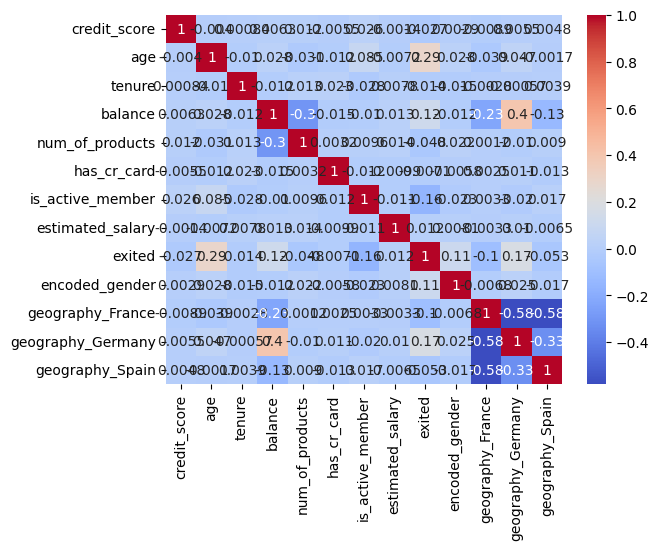

In [110]:
# heat map to check relationship between columns
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [111]:
x = df.drop(columns=['exited'])
y = df['exited']

# Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale features for Logistic Regression
from sklearn.preprocessing import StandardScaler

cols = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[cols])
x_test_scaled = scaler.transform(x_test[cols])

# Phase 4 - Modelling + evaluation


In [112]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

dtc = DecisionTreeClassifier(max_depth=6, random_state=42)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [113]:
# Random Forest
from sklearn.tree import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rfc.firt(x_train, y_train)

ImportError: cannot import name 'RandomForestClassifier' from 'sklearn.tree' (/usr/local/lib/python3.12/dist-packages/sklearn/tree/__init__.py)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
results_clf = {}

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_scaled, y_train)

y_lr = lr.predict(Xp_test_scaled)
results_clf['LogisticRegression'] = {
 'accuracy': accuracy_score(y_test, y_lr),
 'roc_auc': roc_auc_score(y_test, lr.predict_proba(Xp_test_scaled)[:,1])
}

results_clf['LogisticRegression']